Importamos librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Cargamos los archivos

In [2]:
reviewseda = pd.read_parquet('D:/escritorio/STEAM/parquet/reviews.parquet')
reviewseda.head(2)

,posted_year,user_id,item_id,recommend,review,sentiment_analysis
0,2011,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2
1,2011,76561197970982479,22200,True,It's unique and worth a playthrough.,2


Exploración general

In [3]:
print("Tamaño del DataFrame:", reviewseda.shape)
print("Primeras filas del DataFrame:")
print(reviewseda.head())
print("Tipos de datos:")
print(reviewseda.dtypes)
print("Valores nulos:")
print(reviewseda.isnull().sum())

Tamaño del DataFrame: (49186, 6)
Primeras filas del DataFrame:
   posted_year            user_id item_id  recommend  \
0         2011  76561197970982479    1250       True   
1         2011  76561197970982479   22200       True   
2         2011  76561197970982479   43110       True   
3         2014            js41637  251610       True   
4         2013            js41637  227300       True   

                                              review  sentiment_analysis  
0  Simple yet with great replayability. In my opi...                   2  
1               It's unique and worth a playthrough.                   2  
2  Great atmosphere. The gunplay can be a bit chu...                   2  
3  I know what you think when you see this title ...                   2  
4  For a simple (it's actually not all that simpl...                   2  
Tipos de datos:
posted_year            int32
user_id               object
item_id               object
recommend               bool
review            

Análisis de relaciones

In [4]:
# 4. Análisis de relaciones
recommend_by_year = reviewseda.groupby('posted_year')['recommend'].mean()
print("Promedio de recomendaciones por año:")
print(recommend_by_year)

sentiment_recommend_corr = reviewseda[['sentiment_analysis', 'recommend']].corr()
print("Correlación entre sentimiento y recomendación:")
print(sentiment_recommend_corr)

Promedio de recomendaciones por año:
posted_year
2010    0.984848
2011    0.977444
2012    0.990123
2013    0.957597
2014    0.908778
2015    0.855225
Name: recommend, dtype: float64
Correlación entre sentimiento y recomendación:
                    sentiment_analysis  recommend
sentiment_analysis             1.00000    0.25601
recommend                      0.25601    1.00000


Visualización de datos

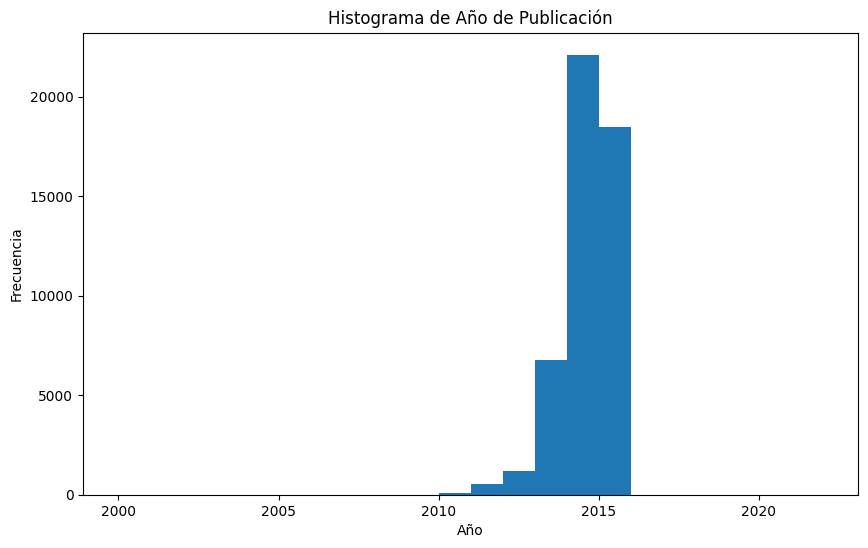

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(reviewseda['posted_year'], bins=range(2000, 2023))
plt.title('Histograma de Año de Publicación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


Gráfico de líneas para mostrar la tendencia de las publicaciones de reseñas a lo largo de los años en reviews

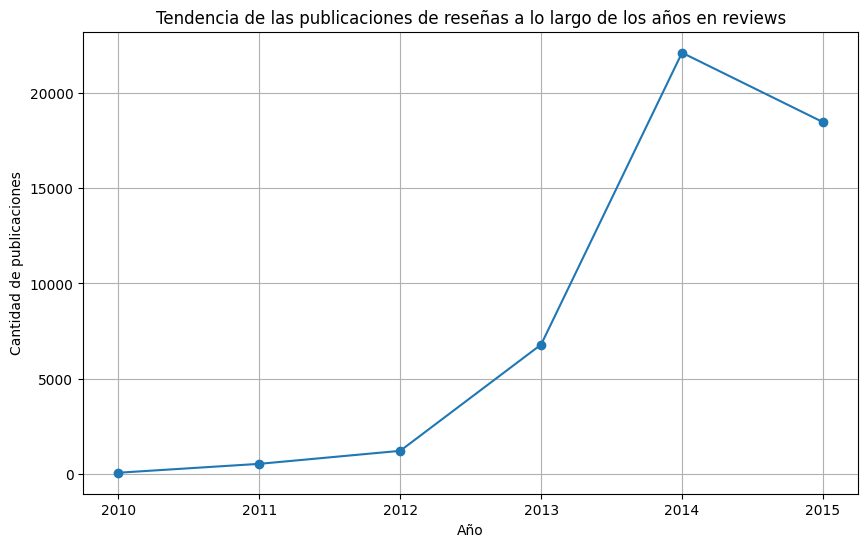

In [6]:
# Gráfico de líneas para mostrar la tendencia de las publicaciones de reseñas a lo largo de los años en reviews
plt.figure(figsize=(10, 6))
reviewseda['posted_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Tendencia de las publicaciones de reseñas a lo largo de los años en reviews')
plt.xlabel('Año')
plt.ylabel('Cantidad de publicaciones')
plt.grid(True)
plt.show()

Análisis de sentimientos:
Exploramos la distribuciónes de los sentimientos de las reseñas y analizar cómo varían según diferentes criterios.

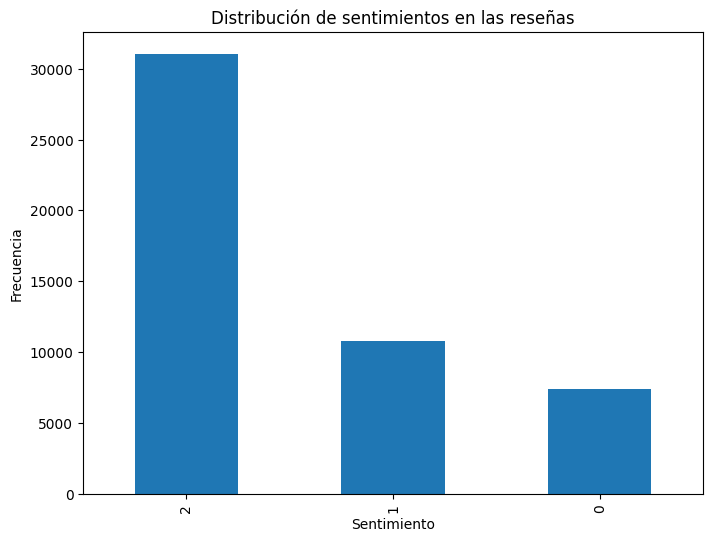

In [7]:
# Visualización de la distribución de sentimientos
plt.figure(figsize=(8, 6))
reviewseda['sentiment_analysis'].value_counts().plot(kind='bar')
plt.title('Distribución de sentimientos en las reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [8]:
itemseda = pd.read_parquet('D:/escritorio/STEAM/parquet/item.parquet')
itemseda.sample(2)

,item_id,item_name,playtime_forever,items_count,user_id
1987079,205100,Dishonored,323,199,76561198043920464
1072216,233450,Prison Architect,1424,111,76561198048709944


Histograma de cantidad de jugadores

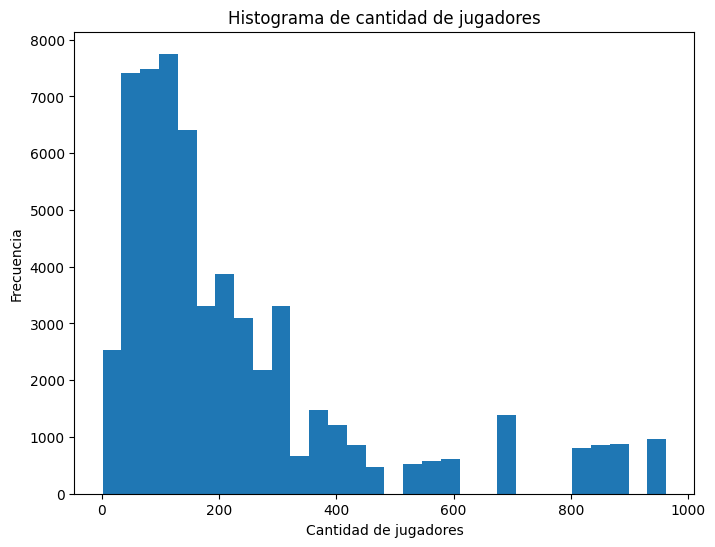

In [9]:
# Histograma de la cantidad de jugadores
plt.figure(figsize=(8, 6))
plt.hist(itemseda['items_count'], bins=30)
plt.title('Histograma de cantidad de jugadores')
plt.xlabel('Cantidad de jugadores')
plt.ylabel('Frecuencia')
plt.show()


Histograma de playtime_forever en datos

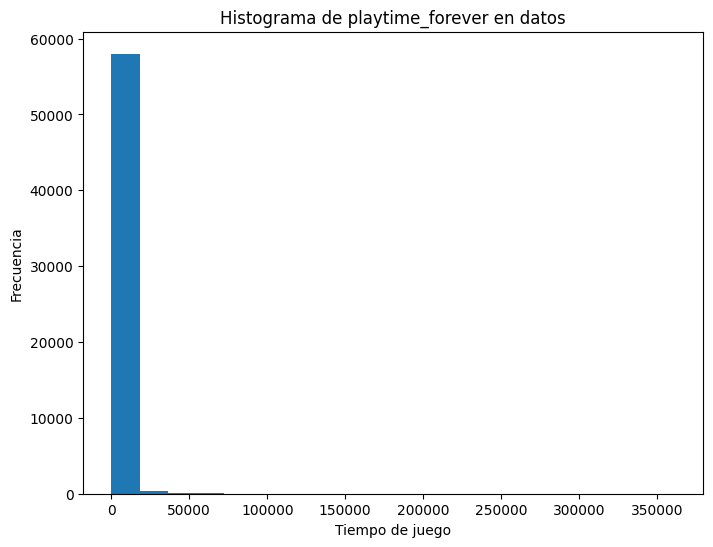

In [10]:
# Histograma para la distribución de playtime_forever en datos
plt.figure(figsize=(8, 6))
plt.hist(itemseda['playtime_forever'], bins=20)
plt.title('Histograma de playtime_forever en datos')
plt.xlabel('Tiempo de juego')
plt.ylabel('Frecuencia')
plt.show()

Cantidad de item por usuarios

<Figure size 1400x500 with 0 Axes>

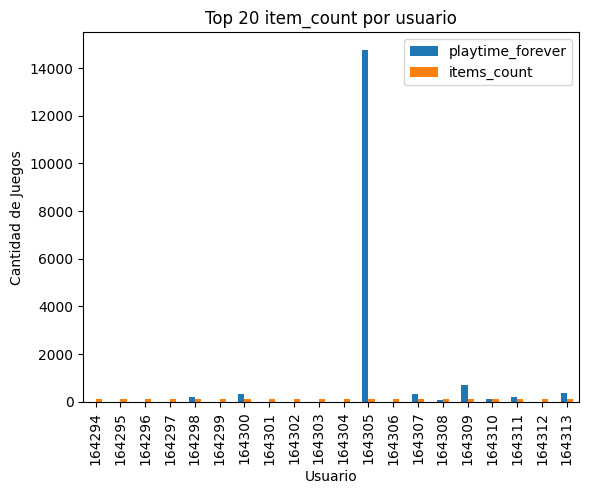

In [11]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
itemseda[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

Diagrama de caja para playtime_forever en datos

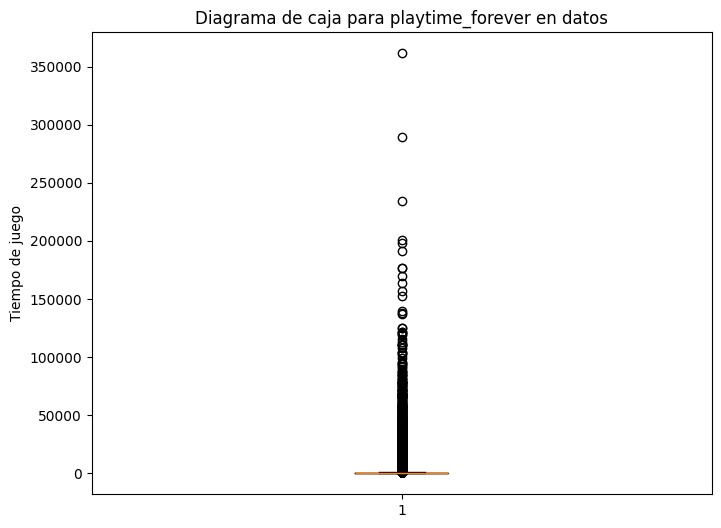

In [12]:
# Identificación y visualización de outliers en datos
plt.figure(figsize=(8, 6))
plt.boxplot(itemseda['playtime_forever'])
plt.title('Diagrama de caja para playtime_forever en datos')
plt.ylabel('Tiempo de juego')
plt.show()

In [13]:
outputeda = pd.read_parquet('D:/escritorio/STEAM/parquet/output_game.parquet')
outputeda.head(4)

,genres,app_name,price,id,developer,release_year
88310,Action,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
88311,Free to Play,Ironbound,0.00,643980,Secret Level SRL,2018
88312,Casual,Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017
88313,Action,弹炸人2222,0.99,767400,彼岸领域,2017


Distribucion de generos

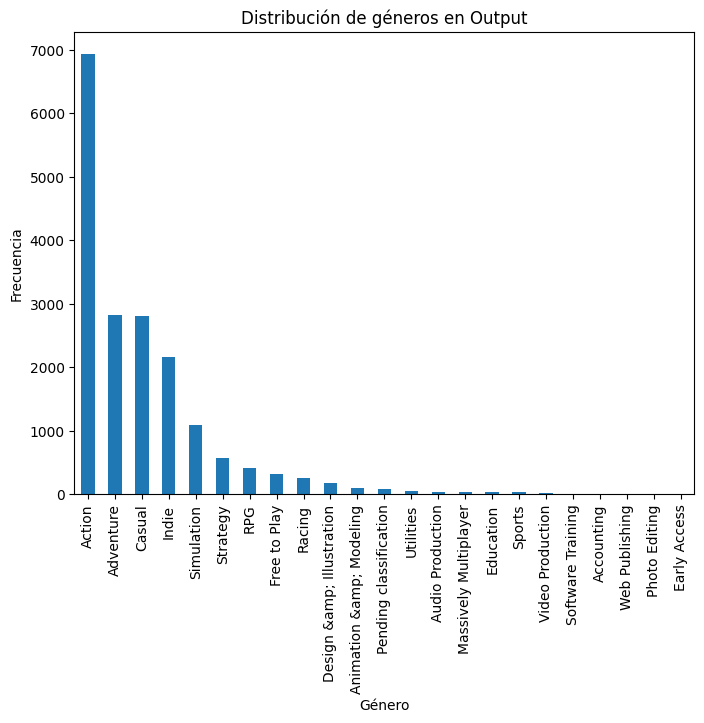

In [14]:
# Visualización de la distribución de géneros en Output
plt.figure(figsize=(8, 6))
outputeda['genres'].value_counts().plot(kind='bar')
plt.title('Distribución de géneros en Output')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

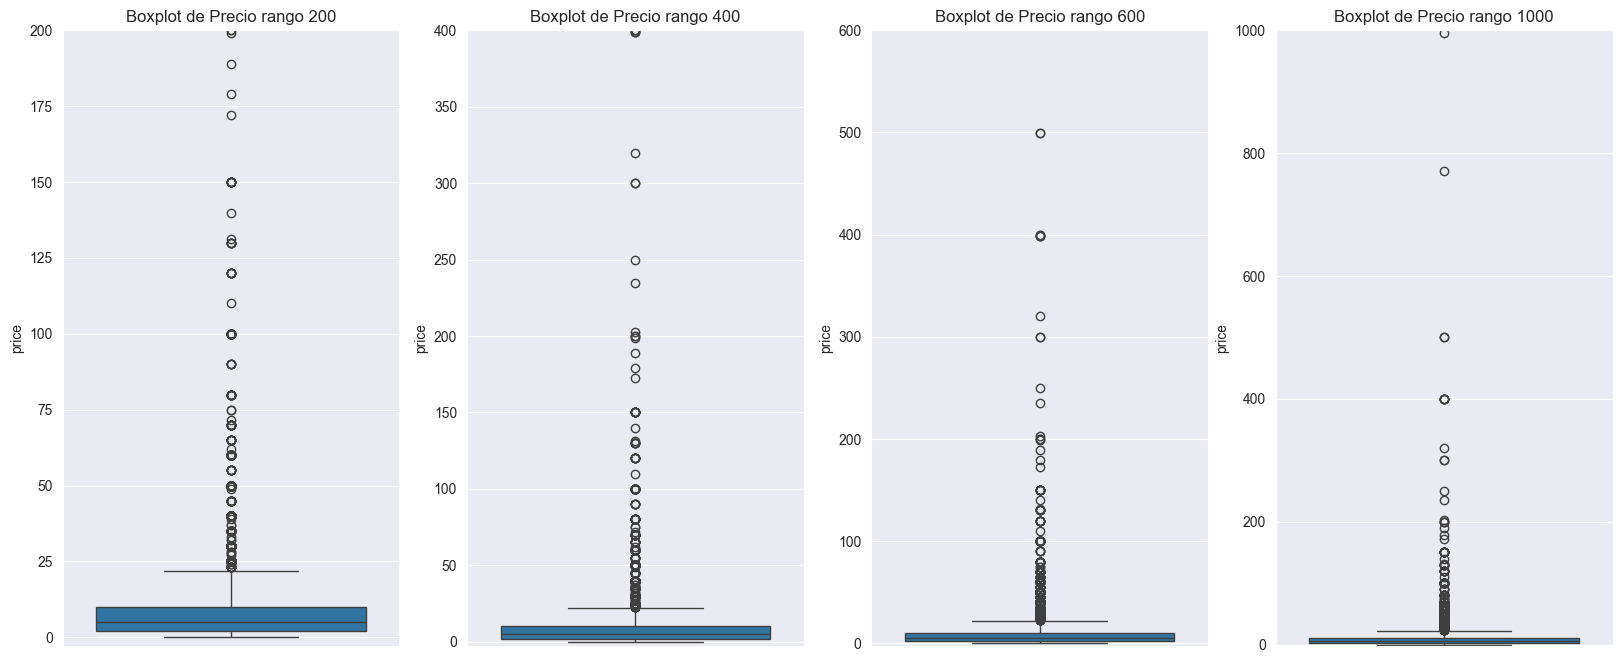

In [15]:
plt.figure(figsize=(20, 8))  # Establecer el tamaño de la figura
sns.set_style("darkgrid")

# Primer0
plt.subplot(1, 4, 1)  # Una fila, dos columnas, primera subparcela
sns.boxplot(data=outputeda, y='price')
plt.ylim(-3, 200)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 200")  # Agregar título

# Segundo
plt.subplot(1, 4, 2)  
sns.boxplot(data=outputeda, y='price')
plt.ylim(-3, 400)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 400")  # Agregar título

#Tercero
plt.subplot(1, 4, 3)  # Una fila, dos columnas, segunda subparcela
sns.boxplot(data=outputeda, y='price')
plt.ylim(-3, 600)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 600")  # Agregar título

#Cuarto
plt.subplot(1, 4, 4)  # Una fila, dos columnas, segunda subparcela
sns.boxplot(data=outputeda, y='price')
plt.ylim(-3, 1000)  # Establecer límites en el eje y
plt.title("Boxplot de Precio rango 1000")  # Agregar título
plt.show()

Nuve de palagras sobre generos

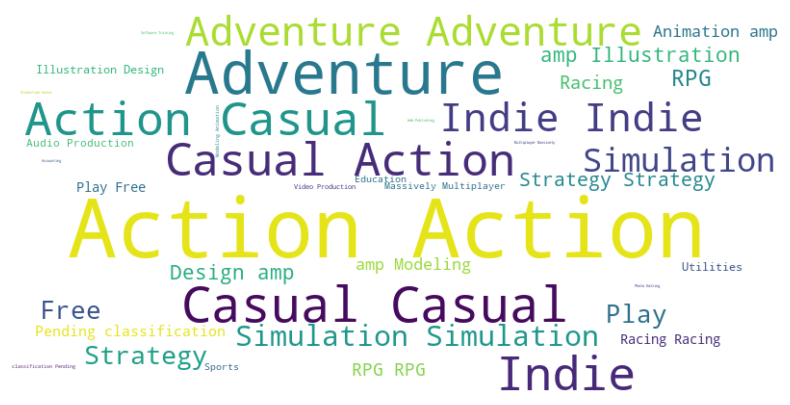

In [16]:
lista = outputeda['genres'].to_list()
texto = ' '.join(outputeda['genres'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cantidad de jugadores por juego

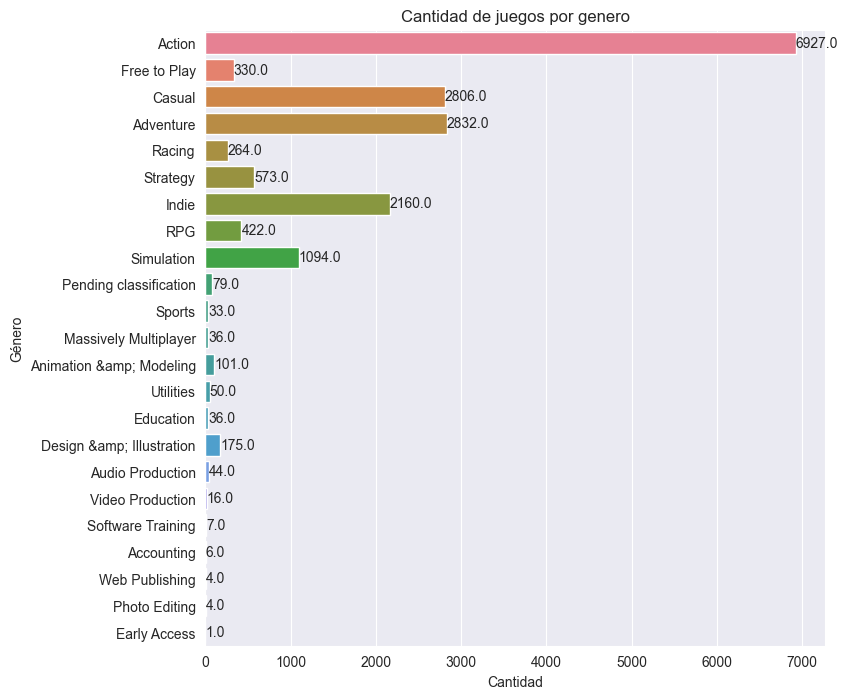

In [17]:
plt.figure(figsize=(8, 8))

ax = sns.countplot(data=outputeda, y='genres', orient='h',hue='genres')
sns.set_style("darkgrid")
ax.set_title('Cantidad de juegos por genero')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Género')

# Agregar etiquetas de valor a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()

TOP 10 DE DESARROLLADORES CON MAS JUEGOS

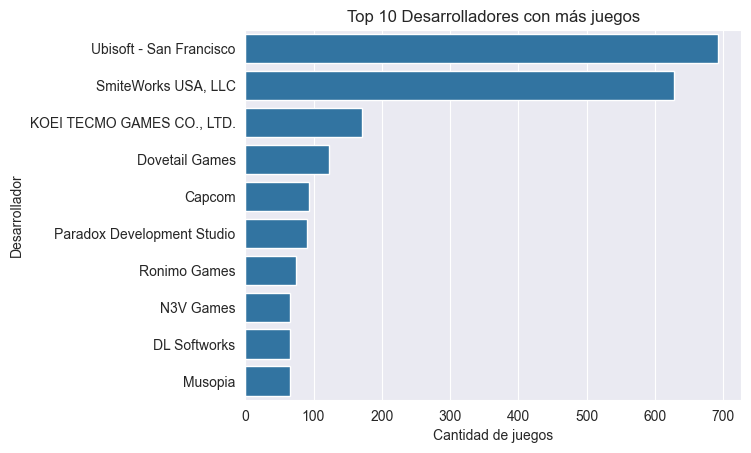

In [18]:
# Obtener los 10 principales desarrolladores
top_devs = outputeda['developer'].value_counts().head(10)

# Filtrar el DataFrame games para incluir solo los juegos de los 10 principales desarrolladores
games_filtered = outputeda[outputeda['developer'].isin(top_devs.index)]

# Trazar el gráfico de barras
sns.countplot(y='developer', data=games_filtered, order=top_devs.index)

plt.xlabel('Cantidad de juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores con más juegos')
plt.show()